# **Data Understanding**

The data  contains the record of the hiring of the three types of cars, Blue car, Autolib 1.4, and Autolib. The data contain the sum of cars taken, returned, the slots available and slots filled every day for six months. 
The data also shows the postal address where every car was taken and returned, also daily points earned after every hire.


In [1]:
## loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
### import data
df=pd.read_csv('http://bit.ly/DSCoreAutolibDataset',index_col=False)

In [3]:
## looking at the data
df.head()


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [4]:
### the shape of our data
df.shape

(16085, 13)

In [5]:
## data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


# **Data Cleaning**

From the data we need to remove outliers, anomalies, missing values, unneccassry columns, duplicates and edit wrong data enty

In [6]:
## dropping the unnecessary columns
df=df.drop(['Utilib_taken_sum','Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum'],axis=1)
df.head(3)


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,27,27


In [7]:
### looking for missing values
df.isnull().sum()

Postal code              0
date                     0
n_daily_data_points      0
dayOfWeek                0
day_type                 0
BlueCars_taken_sum       0
BlueCars_returned_sum    0
Slots_freed_sum          0
Slots_taken_sum          0
dtype: int64

In [8]:
## looking for dublicates
df.duplicated().any()

False

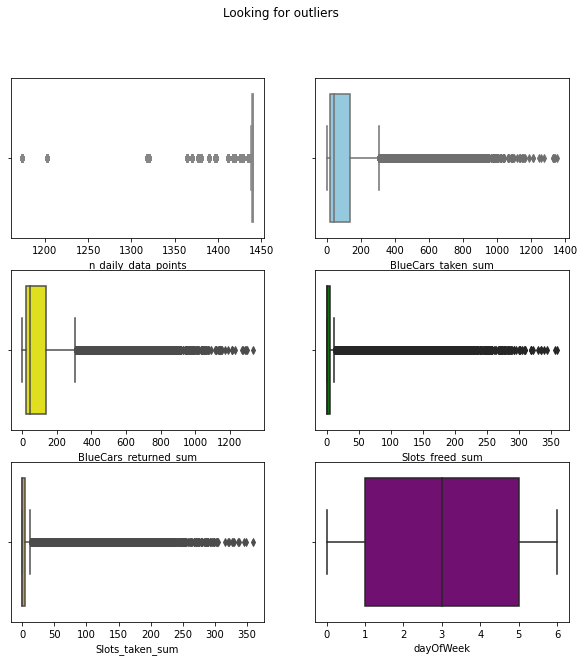

In [9]:
## looking for outliers
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(3,2,figsize=(10,10))
plt.suptitle('Looking for outliers')
sns.boxplot(x='n_daily_data_points',data=df,ax=ax1,color='pink')
sns.boxplot(x='BlueCars_taken_sum',data=df,ax=ax2,color='skyblue')
sns.boxplot(x='BlueCars_returned_sum',data=df,ax=ax3,color='yellow')
sns.boxplot(x='Slots_freed_sum',data=df,ax=ax4,color='green')
sns.boxplot(x='Slots_taken_sum',data=df,ax=ax5,color='orange')
sns.boxplot(x='dayOfWeek',data=df,ax=ax6,color='purple')
plt.show()

In [10]:
### dealing with the outliers
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR =q3-q1
data = df[~((df < (q1 - 1.5 * IQR)) |(df > (q3 + 1.5 * IQR))).any(axis=1)]
data.shape
data.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
3899,91330,1/1/2018,1440,0,weekday,19,9,4,2
3900,91330,1/2/2018,1438,1,weekday,10,10,0,0
3901,91330,1/3/2018,1439,2,weekday,11,13,1,1
3903,91330,1/5/2018,1440,4,weekday,10,6,1,1
3905,91330,1/7/2018,1440,6,weekend,28,17,4,2


our data had alot of outliers which would have affected our statistical analysis. I have removed the outliers.

In [11]:
### separating the date column into days and months
data['year']=pd.DatetimeIndex(data['date']).year
data['day']=pd.DatetimeIndex(data['date']).day
data['month']=pd.DatetimeIndex(data['date']).month
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum,year,day,month
3899,91330,1/1/2018,1440,0,weekday,19,9,4,2,2018,1,1
3900,91330,1/2/2018,1438,1,weekday,10,10,0,0,2018,2,1
3901,91330,1/3/2018,1439,2,weekday,11,13,1,1,2018,3,1
3903,91330,1/5/2018,1440,4,weekday,10,6,1,1,2018,5,1
3905,91330,1/7/2018,1440,6,weekend,28,17,4,2,2018,7,1


In [12]:
##dropping the columns
data=data.drop(['date','dayOfWeek','year'],axis=1)

In [13]:
### naming the months
def month(month):
  if month==1:
    return 'Jan'
  elif month==2:
    return 'Feb'
  elif month==3:
    return 'March'
  elif month == 4:
    return 'April'
  elif month == 5:
    return 'May'
  elif month==6:
    return "June"
data['date']=data['month'].apply(month)

In [14]:
## dropping month
data=data.drop(['month'],axis=1)

In [15]:
### cleaning the categorical data
data['day_type'].unique()

array(['weekday', 'weekend'], dtype=object)

## **Exploratory Data Analysis**

In [16]:
# Data description
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Postal code,9936.0,93094.287440,1009.587326,91330.0,92270.0,93100.0,94000.0,95880.0
n_daily_data_points,9936.0,1439.699678,0.563603,1438.0,1440.0,1440.0,1440.0,1440.0
BlueCars_taken_sum,9936.0,51.498692,50.096392,0.0,17.0,35.0,69.0,302.0
BlueCars_returned_sum,9936.0,51.466284,49.989072,0.0,17.0,34.0,69.0,306.0
Slots_freed_sum,9936.0,0.715781,1.855781,0.0,0.0,0.0,0.0,12.0
Slots_taken_sum,9936.0,0.713567,1.851965,0.0,0.0,0.0,0.0,12.0
day,9936.0,14.305857,8.740868,1.0,7.0,13.0,21.0,31.0


In [17]:
### data mode
data[['date','day_type']].mode().T

,0
date,March
day_type,weekday


Using the mode to analyse the data, we can see we had a high frequency during the month of March and also during the weekends

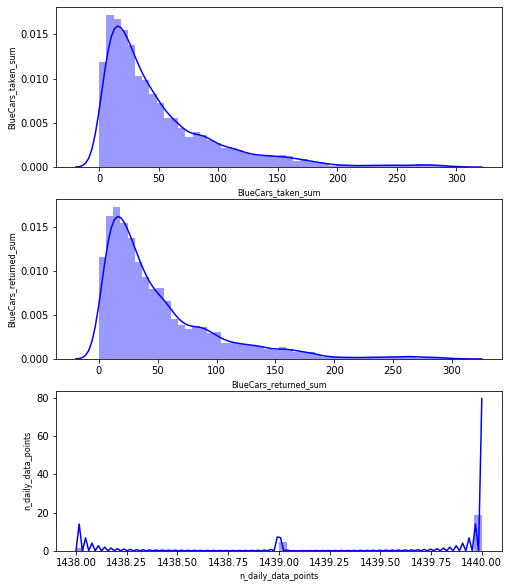

In [18]:
###the frequency distribution
col_names = ['BlueCars_taken_sum', 'BlueCars_returned_sum','n_daily_data_points']

fig, ax = plt.subplots(len(col_names), figsize=(8,10))

for i, col_val in enumerate(col_names):
  sns.distplot(data[col_val], hist=True, ax=ax[i], color='blue')
  #ax[i].set_title('Frequency Dist' + col_val, color='black',fontsize=5,)
  ax[i].set_xlabel(col_val, fontsize=8)
  ax[i].set_ylabel(col_val, fontsize=8)

plt.show()

From the above graph we can see that the  blue car returned and blue cars taken are  normally distributed although it they are all skewed. on the flip side the n_daily data points is not normally distributed.

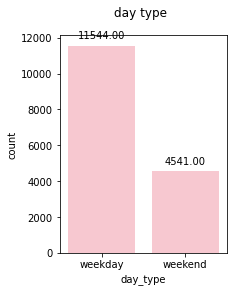

In [20]:
### visualizing the time we had the the  daily data points
fig, ax=plt.subplots(figsize=(3,4))
plt.suptitle('day type')
sns.crayon_palette
sns.countplot(x='day_type',data=df,orient='h',color='pink')
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
              ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

More blue cars were taken during the week days more than they were taken during the weekends..11544 were taken during  weekday and 4541 during the weekends

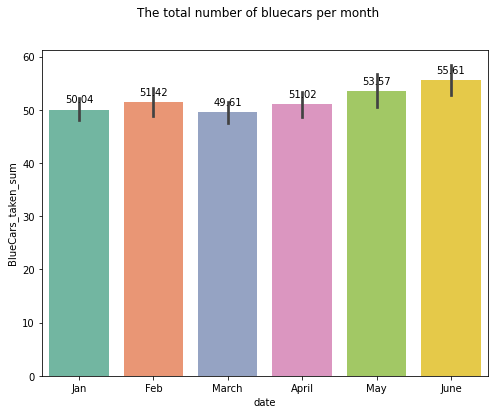

In [21]:
## The number of blue cars by month
fig, ax=plt.subplots(figsize=(8,6))
plt.suptitle('The total number of bluecars per month')
sns.barplot(x='date',y='BlueCars_taken_sum',palette='Set2',data=data)
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
              ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Even if March was the month when we had the highest frequency,it had the least number of blue cars taken. june had the highest, followed by may and February.

In [58]:
### the total number of blue cars in each postal code
postal=data.pivot_table(values=['BlueCars_taken_sum'],index=['Postal code'],aggfunc='sum').sort_values(by='BlueCars_taken_sum',ascending=0)
postal.head(30)

,BlueCars_taken_sum
Postal code,
92130,28695
92600,22257
92300,21435
92000,21240
92150,20336
92500,18045
93100,17113
93400,15593
92700,15115


Above I have arranged the postals codes with the number of blue cars, from the postal code where the highest number of blue cars were taken to the least. 92130 had the highest.

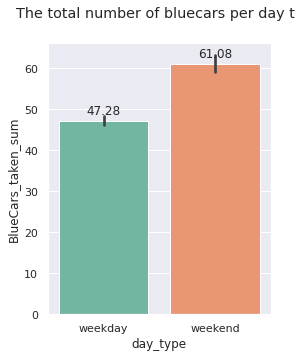

In [23]:
## The number of blue cars by day type
sns.choose_dark_palette
sns.set(style="darkgrid")
fig, ax=plt.subplots(figsize=(4,5))
plt.suptitle('The total number of bluecars per day t')
sns.barplot(x='day_type',y='BlueCars_taken_sum',palette='Set2',data=data)
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
              ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

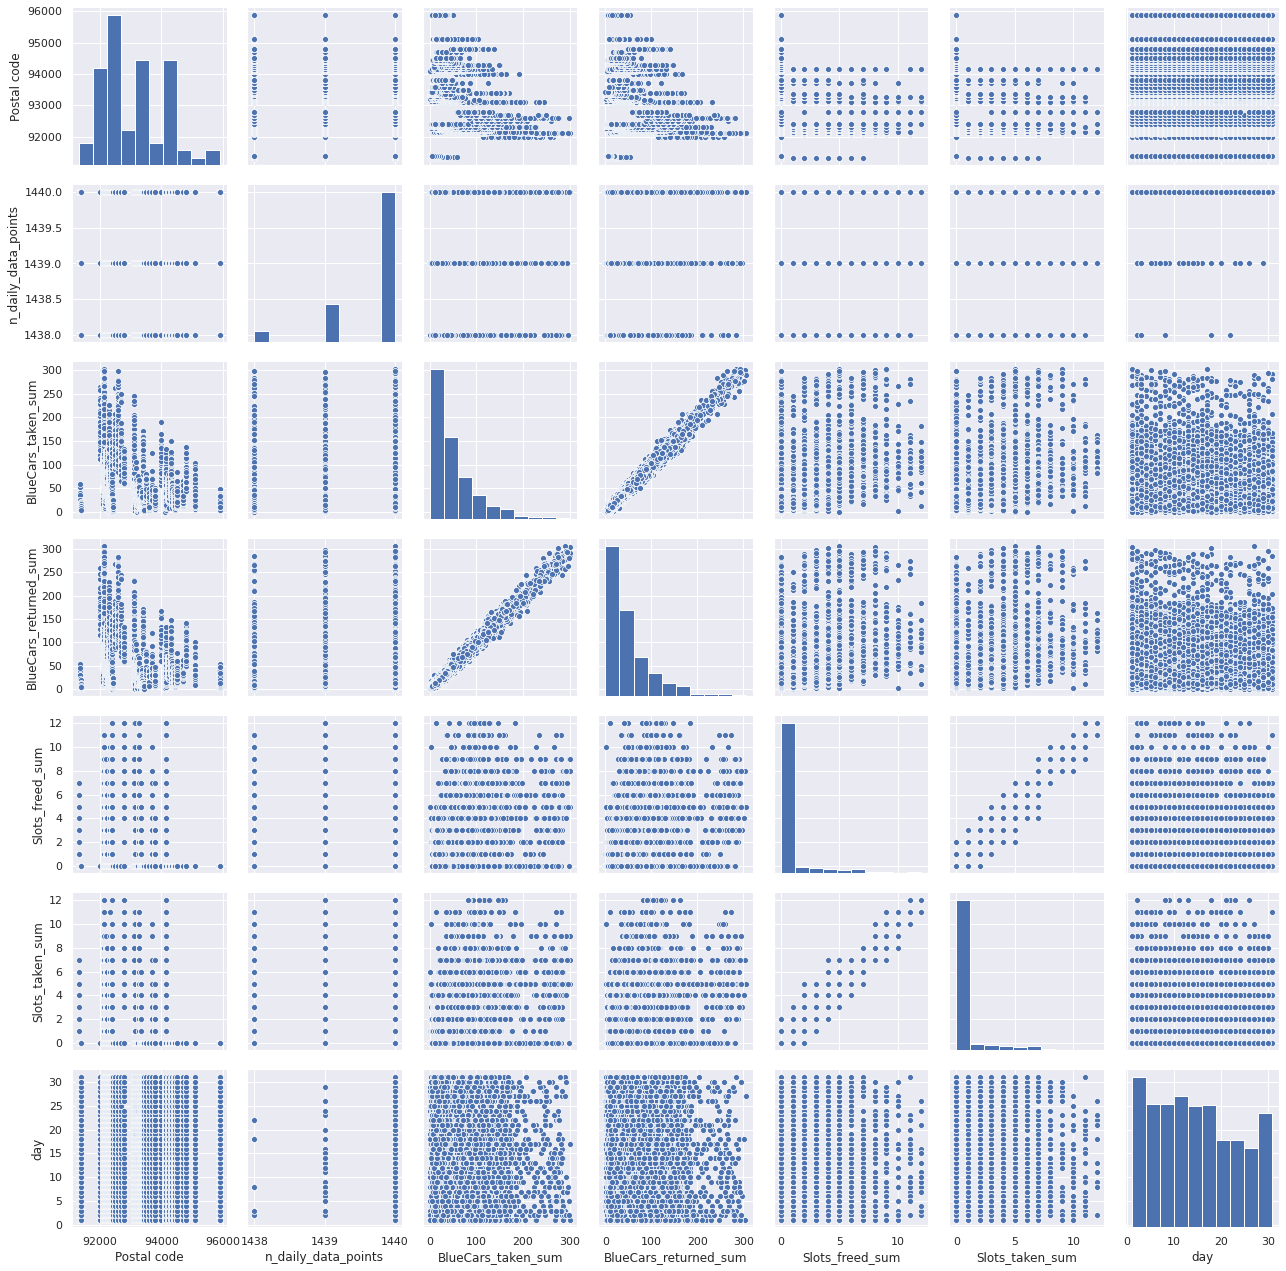

In [24]:
#### a pair plot
sns.pairplot(data)

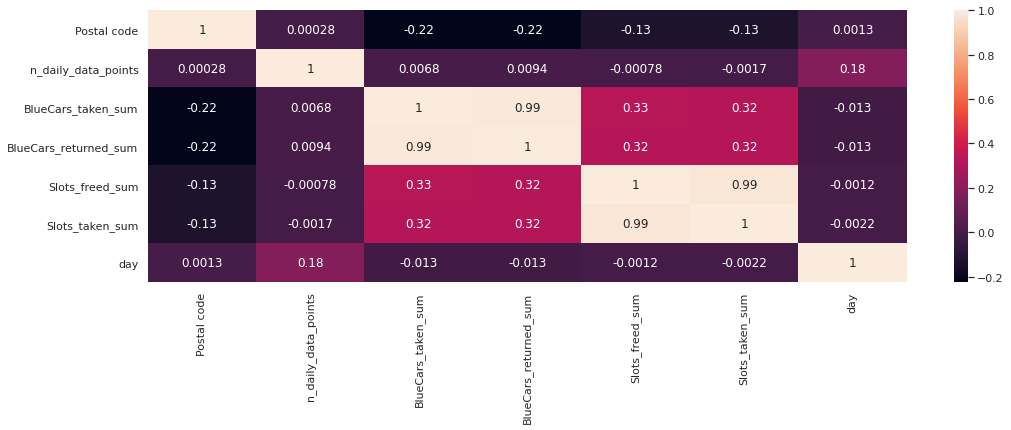

In [25]:
## calculating and visualizing the correlation of the data

fig, ax= plt.subplots(figsize=(17,5))
ax=sns.heatmap(data.corr(),annot=True)


In [26]:
### We will select the blue cars that were taken during the weekends
df=data[data['day_type']=='weekend']
df.shape

(3037, 9)

In [27]:
### having a overview of our data
df.head()

,Postal code,n_daily_data_points,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum,day,date
3905,91330,1440,weekend,28,17,4,2,7,Jan
3911,91330,1440,weekend,24,21,2,2,13,Jan
3912,91330,1440,weekend,27,30,0,0,14,Jan
3918,91330,1439,weekend,16,10,1,1,20,Jan
3919,91330,1440,weekend,18,14,5,5,21,Jan


# **Data Sampling**

lets perform a stratified sampling,the months are the stratas. Through this type of sampling, we will have 40% of the samples from each month, thus reducing the biases since we know if we do a simple random sampling, the samples will not be fairly picked, some months will have very little samples others alot of them.

In [28]:
## doing a stratified  data sampling on the date
df_samp=df.groupby(by="date",group_keys=False).apply(lambda grouped_date : grouped_date.sample(frac=0.4))
df_samp.shape

(1215, 9)

In [29]:
## the  values in each month
df_samp['date'].value_counts()

April    244
March    242
Jan      211
June     182
Feb      181
May      155
Name: date, dtype: int64

## Hypothesis testing

Hypothesis: The number of bluecars taken from postal code 93500 is greater than the blue car taken from postal code 94410

Stating my null hypothesis:

H0 : The Number of bluecars  taken in 93500 is greater than bluecars taken in 94410

H1 : The number of bluecars taken in 93500 is not greater than bluecars taken on 94410

Selecting the statistical test:

To test our study we will use 2 sample z-test

Choosing the  signifance level:

our alpha = 0.05

In [82]:
## choosing our data
postal_93500=df[df['Postal code']==93500]
postal_94410=df[df['Postal code']==94410]
print(postal_93500.head(3))
print(postal_94410.head(3))

       Postal code  n_daily_data_points day_type  ...  Slots_taken_sum  day  date
12349        93500                 1440  weekend  ...                0    7   Jan
12355        93500                 1440  weekend  ...                0   13   Jan
12356        93500                 1440  weekend  ...                0   14   Jan

[3 rows x 9 columns]
       Postal code  n_daily_data_points day_type  ...  Slots_taken_sum  day  date
14844        94410                 1440  weekend  ...                0    7   Jan
14850        94410                 1440  weekend  ...                0   13   Jan
14851        94410                 1440  weekend  ...                0   14   Jan

[3 rows x 9 columns]


Testing the required conditions to perform Z test:



1.   The sample size is greater than 30
2.   The two samples are independent


3.   The samples are normally distributed
4.   The sample was randomly sampled from the population.

From the above conditions we can see from the above that our samples were sampled using stratified Random sampling hence that one is met

The two samples are independent.

What we need to prove is that its normally distributed and the sample size is above 30





In [83]:
### looking at our sample size
print('sample size postal_93500:-',postal_93500.shape)
print('sample size postal_94410:-',postal_94410.shape)

sample size postal_93500:- (40, 9)
sample size postal_94410:- (40, 9)


In [80]:
### Testing the normality of the two samples
from scipy.stats import shapiro
statistc,p_value=shapiro(postal_93500['BlueCars_taken_sum'])
if p_value>0.05:
  print('the sample is normally distributed')
else:
  print('sample is not normally distributed')
print(p_value)

the sample is normally distributed
0.21582293510437012


In [84]:
### Testing the normality of the two samples
from scipy.stats import shapiro
statistc,p_value=shapiro(postal_94410['BlueCars_taken_sum'])
if p_value>0.05:
  print('the sample is normally distributed')
else:
  print('sample is not normally distributed')
print(p_value)

the sample is normally distributed
0.5241860151290894


Our data has satisfied our assumptions we need now test our hypothesis

In [91]:
## two sample z-test
## H0 : mean of bluecars taken in 93500 > mean of blue cars taken in 94410
## H1 : mean of bluecars taken in 93500 not greater than mean of blue cars taken in 94410
from scipy import stats
from statsmodels.stats import weightstats as stest
ztest,p_value=stest.ztest(postal_93500['BlueCars_taken_sum'],postal_94410['BlueCars_taken_sum'])
if p_value< 0.05:
  print('Reject the null hypothesis,the study is significant')
else:
  print('fail to reject the Null hypothesis')
print('pvalue:-',p_value)
print('z statistics:-',ztest)

Reject the null hypothesis,the study is significant
pvalue:- 6.989807672046225e-36
z statistics:- 12.505229031812062


Summary.

From our study, we can conclude that there blues cars taken during the weekend from postal code 93500 are not greater than the blue cars picked during the weekend from postal code 94410 between January 2018 and June 2018.